
# Adiabatic flame temperature including solid carbon formation

Adiabatic flame temperature and equilibrium composition for a fuel/air mixture as a function of equivalence ratio, including formation of solid carbon.



In [1]:
import csv
import sys

import cantera as ct
import numpy as np

Edit these parameters to change the initial temperature, the pressure, and
the phases in the mixture.



In [2]:
T = 300.0
P = 101325.0

# phases
gas = ct.Solution("gri30.yaml")
carbon = ct.Solution("graphite.yaml")

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = "CH4"

# equivalence ratio range
npoints = 50
phi = np.linspace(0.3, 3.5, npoints)

In [3]:
mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(npoints)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi[i], fuel_species, "O2:1.0, N2:3.76")

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate("HP", solver="gibbs", max_steps=1000)

    tad[i] = mix.T
    print("At phi = {0:12.4g}, Tad = {1:12.4g}".format(phi[i], tad[i]))
    xeq[:, i] = mix.species_moles

# write output CSV file for importing into Excel
csv_file = "adiabatic.csv"
with open(csv_file, "w", newline="") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["phi", "T (K)"] + mix.species_names)
    for i in range(npoints):
        writer.writerow([phi[i], tad[i]] + list(xeq[:, i]))
print("Output written to {0}".format(csv_file))

if "--plot" in sys.argv:
    import matplotlib.pyplot as plt

    plt.plot(phi, tad)
    plt.xlabel("Equivalence ratio")
    plt.ylabel("Adiabatic flame temperature [K]")
    plt.show()

At phi =          0.3, Tad =         1066
At phi =       0.3653, Tad =         1208
At phi =       0.4306, Tad =         1343
At phi =       0.4959, Tad =         1472
At phi =       0.5612, Tad =         1595
At phi =       0.6265, Tad =         1713
At phi =       0.6918, Tad =         1825
At phi =       0.7571, Tad =         1931
At phi =       0.8224, Tad =         2030
At phi =       0.8878, Tad =         2119
At phi =       0.9531, Tad =         2192
At phi =        1.018, Tad =         2232
At phi =        1.084, Tad =         2220
At phi =        1.149, Tad =         2176
At phi =        1.214, Tad =         2125
At phi =         1.28, Tad =         2073
At phi =        1.345, Tad =         2022
At phi =         1.41, Tad =         1972
At phi =        1.476, Tad =         1923
At phi =        1.541, Tad =         1875
At phi =        1.606, Tad =         1828
At phi =        1.671, Tad =         1782
At phi =        1.737, Tad =         1737
At phi =        1.802, Tad =      

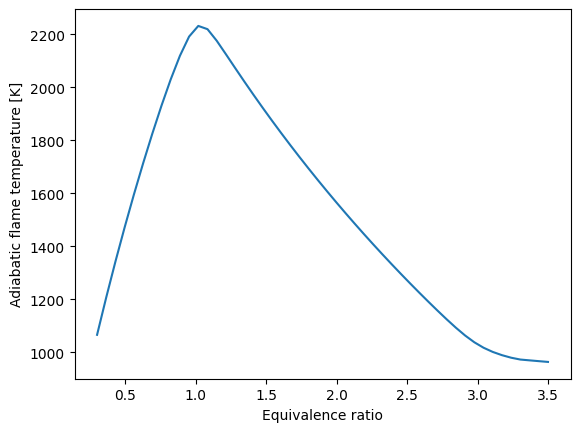

In [4]:
# if '--plot' in sys.argv:
import matplotlib.pyplot as plt

plt.plot(phi, tad)
plt.xlabel("Equivalence ratio")
plt.ylabel("Adiabatic flame temperature [K]")
plt.show()

In [5]:
print(mix.report())

************ Phase gri30 ************
Moles:  1.3193654608069978

  gri30:

       temperature   963.98 K
          pressure   1.0132e+05 Pa
           density   0.24099 kg/m^3
  mean mol. weight   19.063 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -8.0439e+05       -1.5334e+07  J
   internal energy       -1.2248e+06       -2.3349e+07  J
           entropy             11496        2.1914e+05  J/K
    Gibbs function       -1.1886e+07       -2.2658e+08  J
 heat capacity c_p            1746.3             33290  J/K
 heat capacity c_v            1310.1             24975  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2          0.035831           0.33881           -18.497
                 H        2.5741e-11        4.8681e-10           -9.2487
    